In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [25]:
data = pd.read_csv("Billionaire.csv")
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


In [26]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [27]:
data = data.dropna()

In [ ]:
data["NetWorth"]=data["NetWorth"].str.strip('$')
data["NetWorth"]=data["NetWorth"].str.strip('B')
data["NetWorth"]=data["NetWorth"].astype(float)

In [29]:
#Age mean and variance billionaries
mean = data['Age'].mean()
var = data['Age'].var()
print(f'mean={mean}, variance={var}')

mean=63.1136023916293, variance=180.7721364011008


In [32]:
#Total wealth per country
df=data.groupby("Country")["NetWorth"].sum().reset_index()
df=df.sort_values(by='NetWorth',ascending=False)
df.head(5)
df["NetWorth"].min()

1.4

In [38]:
df = data.groupby('Country')['NetWorth'].sum().reset_index()
df=df.sort_values(by=["NetWorth"],ascending=False)
df.head(10)

,Country,NetWorth
66,United States,4384.7
8,China,2496.1
50,Russia,586.0
18,Germany,576.6
24,India,567.3
16,France,507.6
21,Hong Kong,428.4
29,Japan,222.2
6,Canada,217.5
5,Brazil,200.7


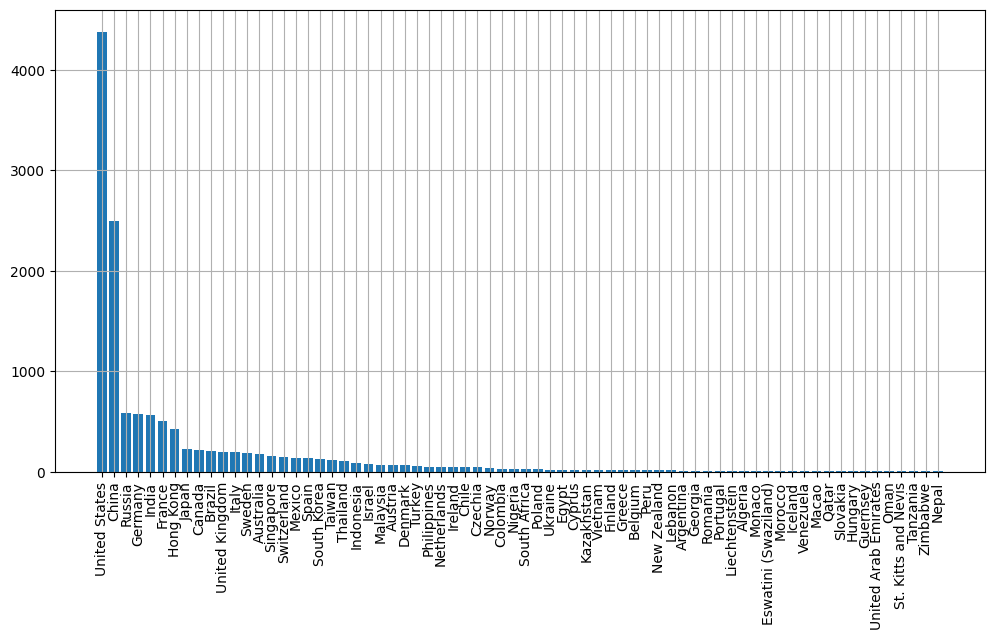

In [33]:
plt.figure(figsize=(12,6))
plt.bar(df["Country"],df["NetWorth"])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
df = data.sort_values(by =['NetWorth'], ascending= False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


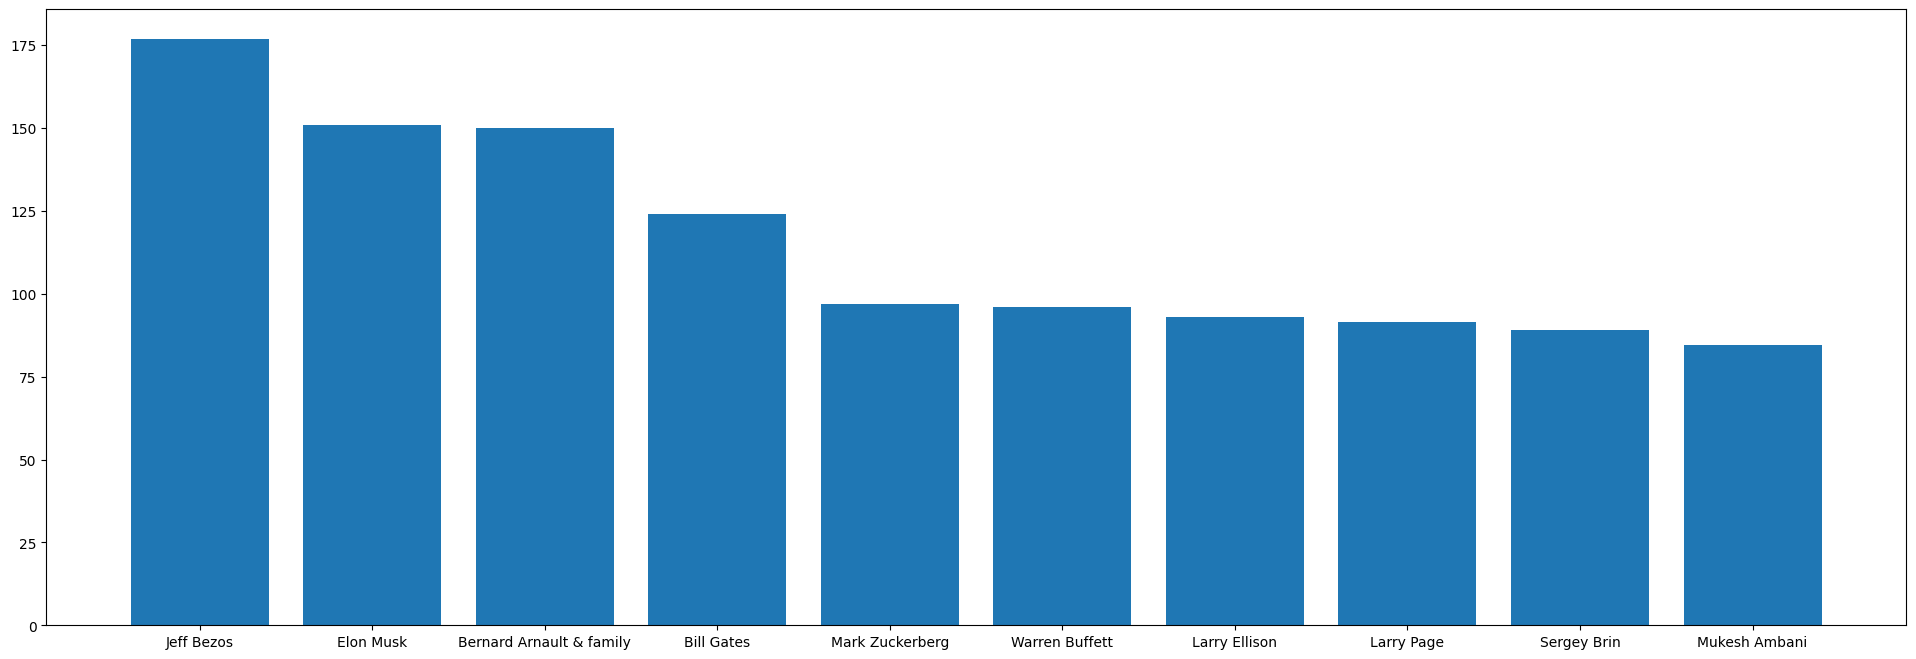

In [14]:
plt.figure(figsize=(24, 8))
plt.bar(df['Name'], df['NetWorth'])
plt.show()

In [39]:
df=data["Country"].value_counts().rename_axis("Country").to_frame("count").reset_index()
df=df.query("count<2")
df=df.sort_values(by="count",ascending=True)
df.head(10)

,Country,count
58,Zimbabwe,1
59,St. Kitts and Nevis,1
60,Tanzania,1
61,Guernsey,1
62,Oman,1
63,United Arab Emirates,1
64,Macao,1
65,Venezuela,1
66,Eswatini (Swaziland),1
67,Algeria,1


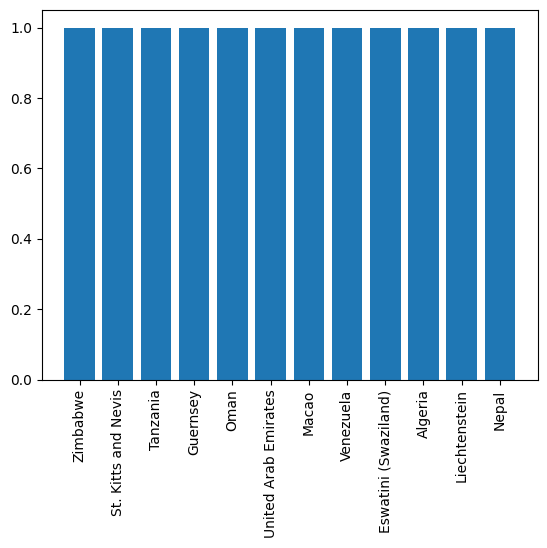

In [40]:
plt.bar(df["Country"],df["count"])
plt.xticks(rotation=90)

plt.show()

In [15]:
df = data['Source'].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


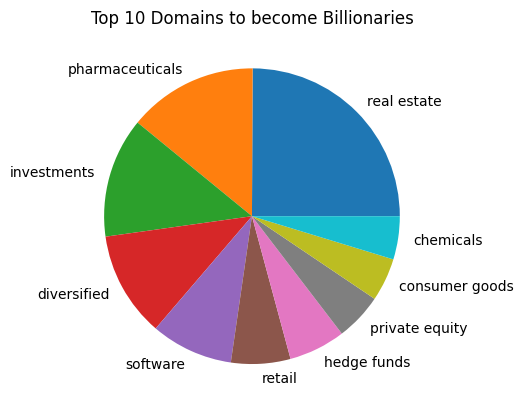

In [17]:
plt.pie(df['count'], labels= df['Source'])
plt.title('Top 10 Domains to become Billionaries')
plt.show()

In [19]:
df = data['Industry'].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


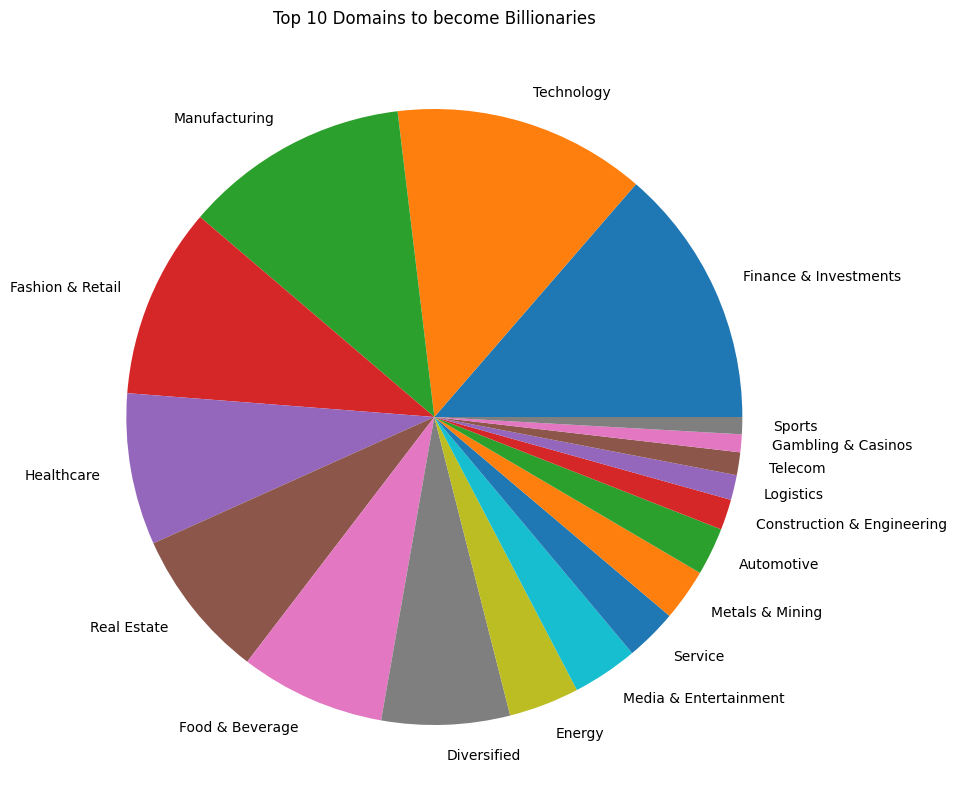

In [21]:
plt.figure(figsize=(24, 10))
plt.pie(df['count'], labels=df['Industry'])
plt.title('Top 10 Domains to become Billionaries')
plt.show()

In [22]:
df = data['Country'].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


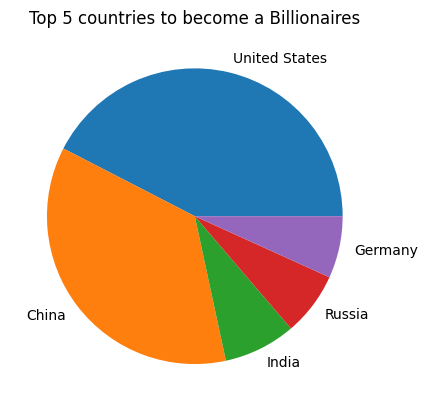

In [23]:
plt.pie(df['count'], labels=df['Country'])
plt.title('Top 5 countries to become a Billionaires')
plt.show()